In [3]:
import pandas as pd

In [ ]:
df=pd.read_csv(r"E:\MDTM40\Project_1_Agri\ICRISAT-District Level Data - ICRISAT-District Level Data.csv")
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
print((df.isnull().sum()/len(df))*100)

In [7]:
print(df.duplicated().sum())

0


In [8]:
df.nunique().sum()

np.int64(326527)

In [9]:
check_sum=(df['FRUITS AND VEGETABLES AREA (1000 ha)']==df['VEGETABLES AREA (1000 ha)']+df['FRUITS AREA (1000 ha)']).all()
print(check_sum)

False


In [ ]:
df.columns=df.columns.str.strip().str.replace(" ","_")
df.columns

In [11]:
# CONNECTING WITH SQL

In [13]:
import mysql.connector

mydb = mysql.connector.connect(
 host="localhost",
 user="root",
 password="",
)

print(mydb)
mycursor = mydb.cursor(buffered=True)

In [ ]:
mycursor.execute("CREATE DATABASE PROJECT2")

In [ ]:
mycursor.execute("use PROJECT2")

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine(f'mysql+pymysql://root:@localhost:3306/project2')

In [ ]:
df.to_sql(name='icrisat_data', con=engine,schema='PROJECT2', if_exists='replace', index=False)

16146

In [ ]:
mydb.commit()

In [14]:
mycursor.execute("select * from project2.icrisat_data")

In [15]:
df.shape, df.size

((16146, 80), 1291680)

In [ ]:
# EDA

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install plotly

In [ ]:
!pip install nbformat

In [6]:
import matplotlib.pyplot as plt

In [7]:
#1. Top 7 RICE PRODUCTION State Data(Bar_plot)
rice_state=(df.groupby(df['State_Name']).agg({'RICE_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='RICE_PRODUCTION_(1000_tons)',ascending=False)).iloc[:7,:]
rice_state

,RICE_PRODUCTION_(1000_tons)
State_Name,
West Bengal,544232.26
Uttar Pradesh,445597.62
Punjab,335040.10
Andhra Pradesh,315185.40
Tamil Nadu,291201.51
Orissa,282532.93
Bihar,231759.00


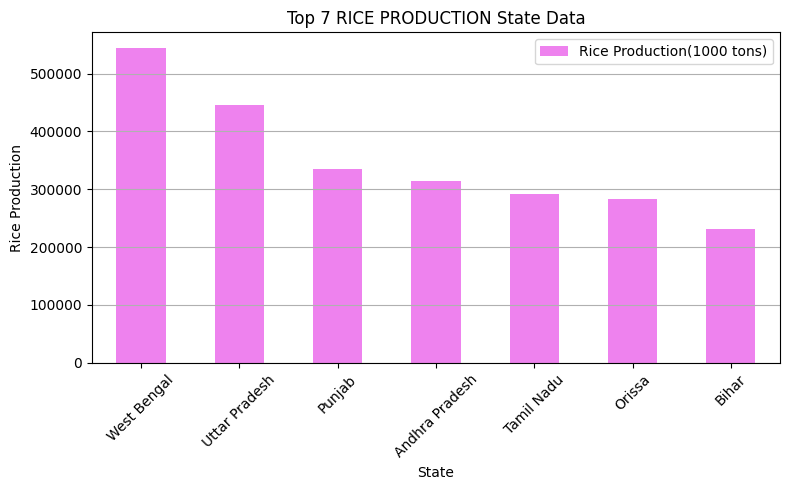

In [8]:
rice_state.plot(kind='bar',figsize=(8,5),color='violet')
plt.xlabel('State')
plt.ylabel('Rice Production')
plt.title('Top 7 RICE PRODUCTION State Data')
plt.legend(['Rice Production(1000 tons)'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
#2. Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
wheat_state=df.groupby(df['State_Name']).agg({'WHEAT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='WHEAT_PRODUCTION_(1000_tons)', ascending=False).iloc[:5,:]
wheat_state

,WHEAT_PRODUCTION_(1000_tons)
State_Name,
Uttar Pradesh,970210.07
Punjab,593848.90
Haryana,348429.60
Madhya Pradesh,338644.25
Rajasthan,265994.99


In [10]:
import seaborn as sns

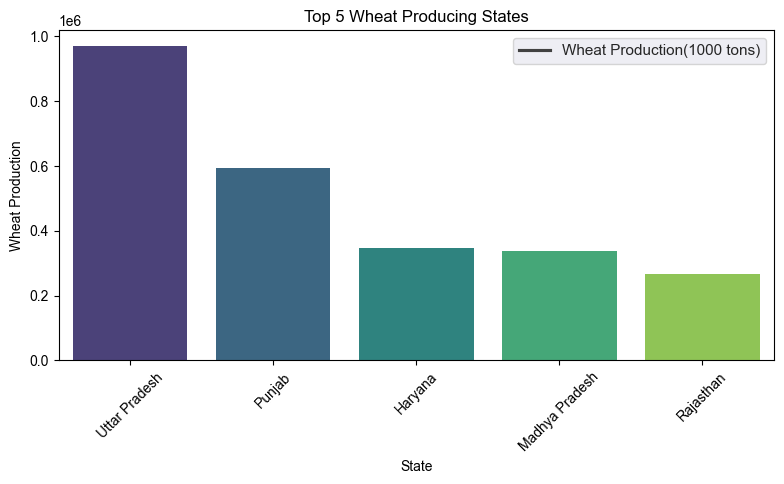

In [11]:
#2.Top 5 Wheat Producing States Data(Bar_chart)
plt.figure(figsize=(8,5))
sns.barplot(x="State_Name",y="WHEAT_PRODUCTION_(1000_tons)",hue='State_Name', palette=sns.color_palette("viridis", 5),data=wheat_state)
sns.set_theme(style="darkgrid")
plt.xlabel("State")
plt.ylabel("Wheat Production")
plt.title("Top 5 Wheat Producing States")
plt.legend(['Wheat Production(1000 tons)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [12]:
wheat_state = wheat_state.reset_index()
wheat_state

,State_Name,WHEAT_PRODUCTION_(1000_tons)
0,Uttar Pradesh,970210.07
1,Punjab,593848.90
2,Haryana,348429.60
3,Madhya Pradesh,338644.25
4,Rajasthan,265994.99


In [13]:
#2. Top 5 Wheat Producing States Data and its percentage(%)(Pie_chart)
import plotly.express as px

fig = px.pie(names=wheat_state['State_Name'], values=wheat_state['WHEAT_PRODUCTION_(1000_tons)'],
             title='Top 5 Wheat Producing States')

fig.show()


In [14]:
#3. Oil seed production by top 5 states
oilseed_state=df.groupby(df['State_Name']).agg({'OILSEEDS_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='OILSEEDS_PRODUCTION_(1000_tons)',ascending=False).iloc[:5,:]
oilseed_state


,OILSEEDS_PRODUCTION_(1000_tons)
State_Name,
Madhya Pradesh,153594.79
Gujarat,126224.01
Rajasthan,122726.86
Maharashtra,95567.91
Andhra Pradesh,76888.09


In [15]:
oilseed_state = oilseed_state.reset_index()

In [16]:
#3. Oil seed production by top 5 states
import plotly.express as px

plt.figure(figsize=(8,5))
fig = px.bar(oilseed_state, x='State_Name', y='OILSEEDS_PRODUCTION_(1000_tons)',color='State_Name',text='OILSEEDS_PRODUCTION_(1000_tons)',
             title="Top 5 Oilseed Producing States")

fig.update_layout( xaxis_title='State', yaxis_title='Oilseed Production (1000 tons)', title_x=0.5, showlegend=False)
                  
fig.update_traces(textposition='outside') 
fig.show()

<Figure size 800x500 with 0 Axes>

In [17]:
#4. Top 7 SUNFLOWER PRODUCTION  State
sunflower_state=df.groupby(['State_Name']).agg({'SUNFLOWER_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='SUNFLOWER_PRODUCTION_(1000_tons)',ascending=False).iloc[:7,:]
sunflower_state=sunflower_state.reset_index()
sunflower_state

,State_Name,SUNFLOWER_PRODUCTION_(1000_tons)
0,Karnataka,10785.87
1,Maharashtra,5599.46
2,Andhra Pradesh,4447.78
3,Telangana,1401.06
4,Punjab,1081.86
5,Tamil Nadu,762.38
6,Uttar Pradesh,552.66


In [18]:
#4. Top 7 SUNFLOWER PRODUCTION  State
import plotly.express as px

fig = px.bar(sunflower_state, x='State_Name', y='SUNFLOWER_PRODUCTION_(1000_tons)',color='State_Name', title="Top 7 Sunflower Producing States", 
             text='SUNFLOWER_PRODUCTION_(1000_tons)')
fig.update_layout(showlegend=False, xaxis_title='State',yaxis_title='Sunflower Production', title_x=0.5, margin=dict(l=100, r=50, t=50, b=80))
fig.update_traces(textposition='outside')
fig.update_layout(
    updatemenus=[dict(type="buttons",direction="left",buttons=list([dict(args=["type", "scatter"],
                    label="Scatter Plot",method="restyle"), dict(args=["type", "bar"],
                    label="Bar Chart",method="restyle")]),),])

fig.show()

In [ ]:
#5. India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane50=df.groupby(df['Year']).agg({'SUGARCANE_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year').tail(50)
sugarcane50=sugarcane50.reset_index()
sugarcane50

In [20]:
#5. India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
fig = px.line(sugarcane50,x='Year',y='SUGARCANE_PRODUCTION_(1000_tons)',title="India's SUGARCANE PRODUCTION From Last 50 Years", markers=True)
fig.update_layout(xaxis_title='Year',yaxis_title='Sugarcane Production', title_x=0.5, margin=dict(l=100, r=50, t=50, b=80))
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,step="day",
                    stepmode="backward"),])),rangeslider=dict(visible=True),))
fig.show()

In [21]:
#6. Rice Production Vs Wheat Production (Last 50y)
rice50=df.groupby(['Year']).agg({'RICE_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year', ascending=True).tail(50)
rice50=rice50.reset_index()

In [ ]:
print(rice50)

In [22]:
wheat50=df.groupby(['Year']).agg({'WHEAT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year', ascending=True).tail(50)
wheat50=wheat50.reset_index()

In [23]:
rice50 = rice50.rename(columns={'RICE_PRODUCTION_(1000_tons)': 'Production',})
rice50['Crop'] = 'Rice'
wheat50 = wheat50.rename(columns={'WHEAT_PRODUCTION_(1000_tons)':'Production'})
wheat50['Crop'] = 'Wheat'


In [24]:
df_rw=pd.concat([rice50,wheat50])
df_rw

,Year,Production,Crop
0,1968,34701.52,Rice
1,1969,35836.01,Rice
2,1970,39324.12,Rice
3,1971,39946.79,Rice
4,1972,37925.93,Rice
...,...,...,...
45,2013,102506.18,Wheat
46,2014,84866.58,Wheat
47,2015,93824.98,Wheat
48,2016,112962.82,Wheat


In [25]:
#6. Rice Production Vs Wheat Production (Last 50y)
fig = px.line(df_rw,x='Year',y='Production',color='Crop',title="Rice Production Vs Wheat Production in Last 50 Years", markers=True)
fig.update_layout(title_x=0.5)
fig.show()

In [26]:
#7. Rice Production By West Bengal Districts
rice_wb=df[(df['State_Name']=='West Bengal')&(df['State_Code']==13)].groupby(['Dist_Name']).agg({'RICE_PRODUCTION_(1000_tons)':'sum'}).reset_index().sort_values(by='RICE_PRODUCTION_(1000_tons)',ascending=False)
rice_wb

,Dist_Name,RICE_PRODUCTION_(1000_tons)
10,Midnapur,98868.28
3,Burdwan,71422.15
0,24 Parganas,63011.99
2,Birbhum,42213.81
1,Bankura,40165.20
11,Murshidabad,37261.24
14,West Dinajpur,35224.87
6,Hooghly,30962.21
12,Nadia,28016.30
13,Purulia,23147.50


In [27]:
#7. Rice Production By West Bengal Districts
fig=px.scatter(rice_wb,x='Dist_Name',y='RICE_PRODUCTION_(1000_tons)',title="Rice Production in West Bengal Districts",color='Dist_Name')
fig.update_layout(title_x=0.5, xaxis_title='District Name',yaxis_title='Rice Production',showlegend=False)
fig.update_layout(updatemenus=[dict(buttons=list([dict(args=["type", "scatter"],
                    label="Scatter Plot",method="restyle"),
                dict(args=["type", "bar"],label="Bar Chart",method="restyle")]),direction="down",),])
fig.update_traces(textposition='top center')
fig.show()

In [28]:
#8. Top 10 Wheat Production Years From UP
wheat10=df[df['State_Name']=='Uttar Pradesh'].groupby(['Year']).agg({'WHEAT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='WHEAT_PRODUCTION_(1000_tons)',ascending=False).iloc[:10,:]
wheat10=wheat10.reset_index()
wheat10

,Year,WHEAT_PRODUCTION_(1000_tons)
0,2017,35798.60
1,2016,35120.90
2,2011,32271.69
3,2013,31611.63
4,2010,30602.91
5,2008,29110.93
6,2012,29041.28
7,2009,27910.80
8,2015,27010.39
9,2003,26445.45


In [29]:
#8. Top 10 Wheat Production Years From UP
fig = px.bar(wheat10,x='Year',y='WHEAT_PRODUCTION_(1000_tons)',title="Wheat Production Years From UP",color="Year")
fig.update_layout(title_x=0.5, xaxis_title='Year',yaxis_title='Wheat Production')
fig.update_layout(updatemenus=[dict(buttons=list([dict(args=["type", "scatter"],
                    label="Scatter Plot",method="restyle"),
                dict(args=["type", "bar"],label="Bar Chart",method="restyle")]),direction="down",),])
fig.update_traces(textposition='auto')
fig.show()

In [ ]:
#9. Millet Production (Last 50y)
millet50=df.groupby(df['Year']).agg({'PEARL_MILLET_PRODUCTION_(1000_tons)':'sum','FINGER_MILLET_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year').tail(50)
millet50=millet50.reset_index()
millet50

In [31]:
##9. Millet Production (Last 50y)
fig = px.line(millet50,x='Year',y=['PEARL_MILLET_PRODUCTION_(1000_tons)','FINGER_MILLET_PRODUCTION_(1000_tons)'],title="Millet Production in Last 50 Years", markers=True)
fig.update_layout(title_x=0.5, yaxis_title="Millet Production")
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,step="day",
                    stepmode="todate"),])),rangeslider=dict(visible=True),))
fig.show()

In [32]:
#10. Sorghum Production (Kharif and Rabi) by Region
sorghum_r=df.groupby(['State_Name','Dist_Name']).agg({'KHARIF_SORGHUM_PRODUCTION_(1000_tons)':'sum','RABI_SORGHUM_PRODUCTION_(1000_tons)':'sum'})
sorghum_r=sorghum_r.reset_index()
sorghum_r

,State_Name,Dist_Name,KHARIF_SORGHUM_PRODUCTION_(1000_tons),RABI_SORGHUM_PRODUCTION_(1000_tons)
0,Andhra Pradesh,Ananthapur,1123.55,1036.57
1,Andhra Pradesh,Chittoor,290.32,28.11
2,Andhra Pradesh,East Godavari,68.53,60.27
3,Andhra Pradesh,Guntur,651.09,1960.84
4,Andhra Pradesh,Kadapa YSR,1511.60,342.36
...,...,...,...,...
306,West Bengal,Midnapur,0.22,0.00
307,West Bengal,Murshidabad,5.48,0.00
308,West Bengal,Nadia,0.06,0.00
309,West Bengal,Purulia,0.61,0.00


In [33]:
#10. Sorghum Production (Kharif and Rabi) by Region
fig=px.bar(sorghum_r,x='State_Name',y=['KHARIF_SORGHUM_PRODUCTION_(1000_tons)','RABI_SORGHUM_PRODUCTION_(1000_tons)'])
fig.update_layout(title_x=0.5, yaxis_title="Sorghum Production",barmode='group')
fig.show()

In [34]:
#11. Top 7 States for Groundnut Production
gn_state=df.groupby(['State_Name']).agg({'GROUNDNUT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='GROUNDNUT_PRODUCTION_(1000_tons)',ascending=False).iloc[:7,:]
gn_state=gn_state.reset_index()
gn_state

,State_Name,GROUNDNUT_PRODUCTION_(1000_tons)
0,Gujarat,98321.42
1,Andhra Pradesh,57844.81
2,Tamil Nadu,57662.42
3,Karnataka,36033.05
4,Maharashtra,29002.06
5,Rajasthan,17354.29
6,Orissa,16857.48


In [35]:
#11. Top 7 States for Groundnut Production
fig=px.bar(gn_state,x='State_Name',y='GROUNDNUT_PRODUCTION_(1000_tons)',color='State_Name', title='Top States for Groundnut Production', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_x=0.5, yaxis_title="Groundnut Production")
fig.update_layout( xaxis_title='State', yaxis_title='Groundnut Production', title_x=0.5, showlegend=False)
                  
fig.update_traces(textposition='outside') 
fig.show()

In [36]:
#12. Soybean Production by Top 5 States and Yield Efficiency
soybean_state=df.groupby(['State_Name']).agg({'SOYABEAN_PRODUCTION_(1000_tons)':'sum', 'SOYABEAN_YIELD_(Kg_per_ha)':'sum'}).sort_values(by=['SOYABEAN_PRODUCTION_(1000_tons)','SOYABEAN_YIELD_(Kg_per_ha)'],ascending=False).head(5)
soybean_state=soybean_state.reset_index()
soybean_state

,State_Name,SOYABEAN_PRODUCTION_(1000_tons),SOYABEAN_YIELD_(Kg_per_ha)
0,Madhya Pradesh,136006.52,1161169.25
1,Maharashtra,58643.93,770938.60
2,Rajasthan,21174.99,404598.94
3,Telangana,3022.13,119230.77
4,Karnataka,2873.98,201773.29


In [37]:
soybean_state['SOYABEAN_PRODUCTION_(kg)'] = soybean_state['SOYABEAN_PRODUCTION_(1000_tons)'] * 1000 * 1000
fig=px.bar(soybean_state,x='State_Name',y=['SOYABEAN_PRODUCTION_(1000_tons)','SOYABEAN_YIELD_(Kg_per_ha)'], title='Top States for Soyabean Production' )
fig.update_layout(title_x=0.5,xaxis_title='State', yaxis_title="Soyabean Production",barmode='group')

fig.show()

In [ ]:
#13. Oilseed Production in Major States
oilseed_state=df.groupby(['State_Name']).agg({'OILSEEDS_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='OILSEEDS_PRODUCTION_(1000_tons)',ascending=False)
oilseed_state=oilseed_state.reset_index()
oilseed_state

In [39]:
#13. Oilseed Production in Major States
fig = px.line(oilseed_state,x='State_Name',y='OILSEEDS_PRODUCTION_(1000_tons)',title="Oilseed Production in Major States", markers=True,color='State_Name',                  # Optional: if multiple lines
    color_discrete_sequence=px.colors.qualitative.Set1 )
fig.update_layout(xaxis_title='State Name',yaxis_title='SOilseed Production', title_x=0.5, margin=dict(l=100, r=50, t=50, b=80))
fig.show()

In [ ]:
#14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
dict={"Area":df['RICE_AREA_(1000_ha)'].sum(),"Production":df['RICE_PRODUCTION_(1000_tons)'].sum(),"Crop":"Rice"}
rice_area=pd.DataFrame(dict,index=[0])
rice_area

In [ ]:
dict1={"Area":df['WHEAT_AREA_(1000_ha)'].sum(),"Production":df['WHEAT_PRODUCTION_(1000_tons)'].sum(),"Crop":"Wheat"}
wheat_area=pd.DataFrame(dict1,index=[0])
wheat_area

In [ ]:
dict2={"Area":df['MAIZE_AREA_(1000_ha)'].sum(),"Production":df['MAIZE_PRODUCTION_(1000_tons)'].sum(),"Crop":"Maize"}
maize_area=pd.DataFrame(dict2,index=[0])
maize_area

In [43]:
imapct_df=pd.concat([rice_area,wheat_area,maize_area],axis=0,ignore_index=True)
imapct_df

,Area,Production,Crop
0,2076265.67,3631066.91,Rice
1,1244177.59,2938777.79,Wheat
2,324891.75,582115.18,Maize


In [44]:
#14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
fig=px.bar(imapct_df,x="Crop", y=["Area","Production"])
fig.update_layout(
    title="Impact of Cultivated Area on Crop Production",
    title_x=0.5,
    yaxis_title="Value (1000 ha / 1000 tons)",
    barmode='group'  # Ensures grouped bars
)
fig.show()

In [ ]:
#15. Rice vs. Wheat Yield Across States
rice_yield=df.groupby(['State_Name']).agg({'RICE_YIELD_(Kg_per_ha)':'sum'})
rice_yield=rice_yield.reset_index()
rice_yield

In [ ]:
wheat_yeild=df.groupby(['State_Name']).agg({'WHEAT_YIELD_(Kg_per_ha)':'sum'})
wheat_yeild=wheat_yeild.reset_index()
wheat_yeild

In [47]:
rice_yield = rice_yield.rename(columns={'RICE_YIELD_(Kg_per_ha)': 'Yeild'})
rice_yield['Crop'] = 'Rice'
wheat_yeild = wheat_yeild.rename(columns={'WHEAT_YIELD_(Kg_per_ha)':'Yeild'})
wheat_yeild['Crop'] = 'Wheat'

In [ ]:
rw_yeild=pd.concat([rice_yield,wheat_yeild],axis=0)
rw_yeild

In [49]:
#15. Rice vs. Wheat Yield Across States
import plotly.express as px
custom_colors = {'Rice': 'seagreen','Wheat': 'darkorange'}
fig=px.bar(rw_yeild,x='State_Name', y='Yeild',color="Crop",color_discrete_map=custom_colors)
fig.update_layout(xaxis_title="State Name", title="Rice vs Wheat Yield Across States", title_x=0.5, yaxis_title="Yeild (Kg_per_ha)", barmode='group', xaxis_tickangle=-45)
fig.show()